**This project involved a variety of machine learning techniques including PCA, SVM, and neural network models. The final parts are taking a hand calculated back propagation that was done on paper and turning it into a manually coded version, and the last two parts consist of ways to optimize the neural net I created.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, Dropout, Flatten
from sklearn.decomposition import PCA
import seaborn as sns
import keras

from sklearn import metrics
%matplotlib inline 

Using TensorFlow backend.


# 2a. PCA#

In [2]:
## load in data
## Split into x and y 
## y = the label for the digits 
## x is the entire dataset without the digit labels 

mnist_train = pd.read_csv("train.csv")
label = mnist_train['label']
without_label= mnist_train.drop("label",axis=1)

In [3]:
## Standardize data

from sklearn.preprocessing import StandardScaler
standardized = StandardScaler().fit_transform(without_label)
print(standardized.shape)
display(standardized)

(42000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Two Dimensions

C:\Users\mtbri\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


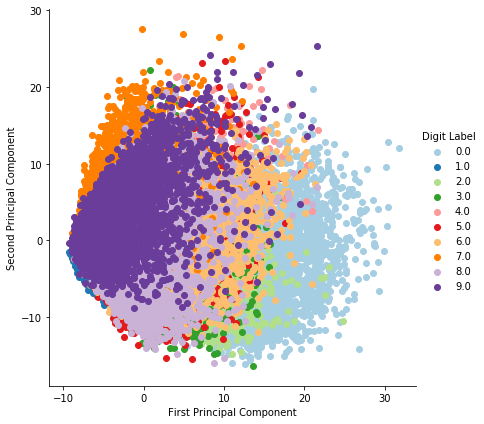

In [8]:
## Create mnist dataframe
mnist_df = pd.DataFrame(standardized)

## Initiate PCA with 2 components 
pca2 = PCA(n_components =2 )
new_pca = pca2.fit_transform(mnist_df)


pca_data = np.vstack((new_pca.T, label)).T

## Create plot with PCA for first two components 

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("First Principal Component", "Second Principal Component", "Digit Label"))
g = sns.FacetGrid(pca_df, hue="Digit Label", size=6, palette= "Paired").map(plt.scatter,'First Principal Component', 'Second Principal Component').add_legend()

plt.show()

g.savefig("PCA_2.png", bbox_inches='tight', dpi=600)



### Three Dimensions

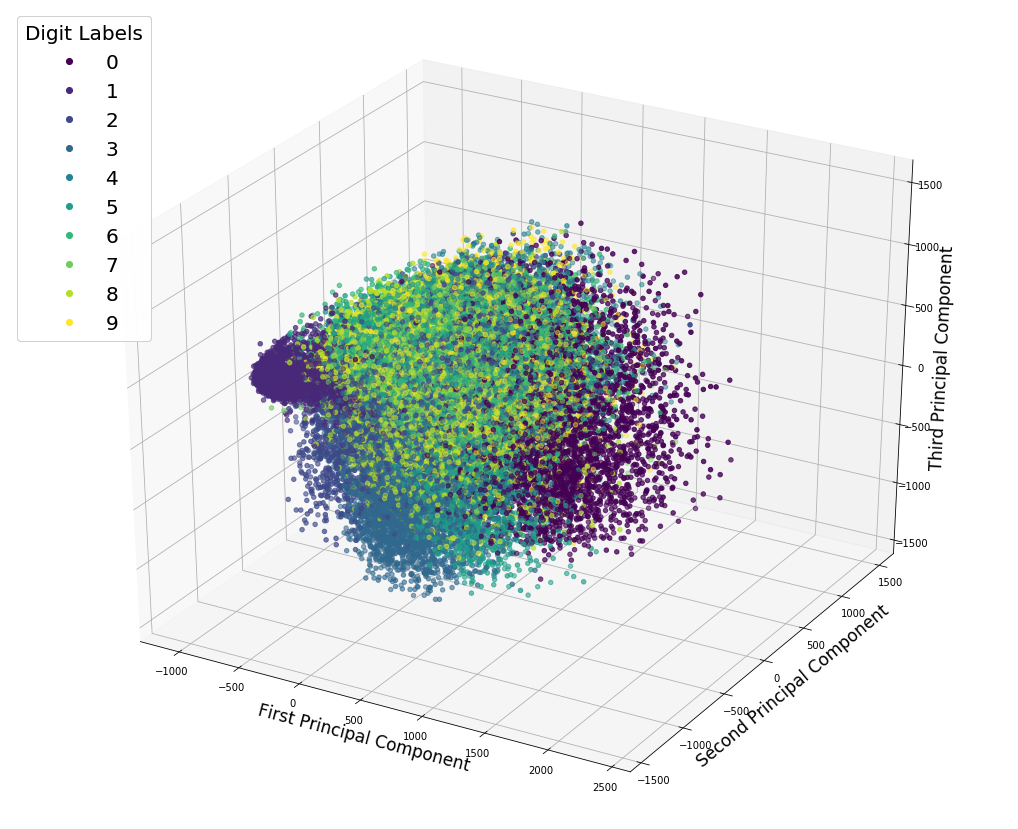

In [32]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Run PCA with three components 
mnist_df = pd.DataFrame(without_label)
pca3 = PCA(n_components =3)
new_pca3 = pca3.fit_transform(mnist_df)

my_dpi=96

## Create data frame with pca results and labels, along with column labels
pca_data3 = np.vstack((new_pca3.T, label)).T
pca_df3 = pd.DataFrame(data=pca_data3, columns=("First Principal Component", "Second Principal Component", "Third Principal Component", "Digit Label"))

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

## Plot principal components and create axes labels and titles
scatter = ax.scatter(pca_df3['First Principal Component'], pca_df3['Second Principal Component'], pca_df3['Third Principal Component'], c= pca_df3["Digit Label"], s=20)

ax.set_xlabel("First Principal Component", fontsize=17)
ax.set_ylabel("Second Principal Component", fontsize=17)
ax.set_zlabel("Third Principal Component", fontsize=17)


legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="upper left", title="Digit Labels", fontsize= 20, title_fontsize=20)
ax.add_artist(legend1)


fig.savefig("PCA_3.png", bbox_inches='tight', dpi=600)

### Sample Set

C:\Users\mtbri\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


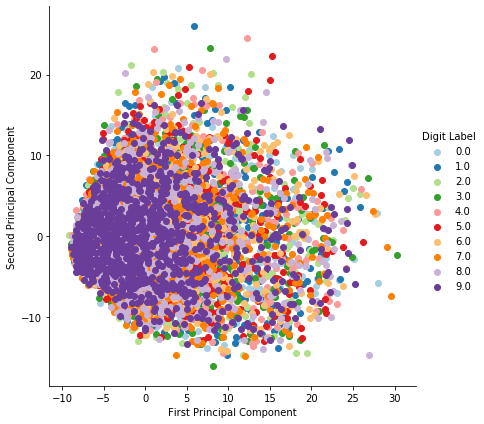

In [54]:
import random

## Illustrate principal components analysis with a random sample of the MNIST data 

mnist_sample =  mnist_df.sample(frac=0.25, random_state=1)
#display(mnist_sample)

pca4 = PCA(n_components = 2)
new_pca4 = pca4.fit_transform(mnist_sample)

label_sample = random.sample(list(label), 10500)

pca4_data = np.vstack((new_pca4.T, label_sample)).T

## Create plot with PCA for first two components 

# creating a new data fram which help us in ploting the result data
pca4_df = pd.DataFrame(data=pca4_data, columns=("First Principal Component", "Second Principal Component", "Digit Label"))
i = sns.FacetGrid(pca4_df, hue="Digit Label", size=6, palette= "Paired").map(plt.scatter,'First Principal Component', 'Second Principal Component').add_legend()

plt.show()

i.savefig("PCA_4.png", bbox_inches='tight', dpi=600)

### Proportion of Variance Explained Plot

In [11]:
## Calculate explained variance across 784 input dimensions for the PCA

pca_final = PCA(n_components = 784 )
pca_variance = pca_final.fit_transform(mnist_df)

pve = pca_final.explained_variance_ratio_


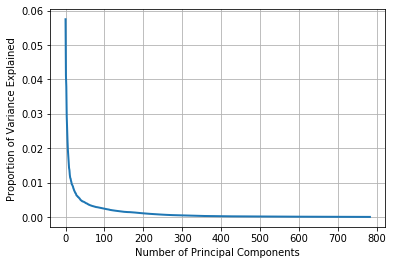

In [13]:
h= plt.figure(1, figsize=(6, 4))

## Plot PVE across all 784 dimensions
## Plot shows the dropoff in variance explained drops off around 300
plt.plot(pve, linewidth=2)

plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()


h.savefig("PCA_Var.png", bbox_inches='tight', dpi=600)

# 3b. Support Vector Machines# 

## Linear SVM ##

In [26]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(standardized, label, test_size = 0.2 ,random_state = 10)


## Linear SVM

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [21]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9188095238095239 



## Radial Basis Function SVM 

In [22]:
## RBF SVM

rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

## predict
y_pred_rbf = rbf_model.predict(X_test)

C:\Users\mtbri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")

accuracy: 0.9602380952380952 



## Sigmoid SVM 

In [25]:
## Sigmoid SVM

sig_model = SVC(kernel='sigmoid')
sig_model.fit(X_train, y_train)

## predict
y_pred_sig = sig_model.predict(X_test)

C:\Users\mtbri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sig), "\n")

accuracy: 0.9042857142857142 



## Polynomial SVM with Two Degrees #

In [27]:
## Poly model SVM with 2 degrees

poly_model = SVC(kernel='poly', degree=2)
poly_model.fit(X_train, y_train)

## predict
y_pred_poly = poly_model.predict(X_test)

C:\Users\mtbri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly), "\n")

accuracy: 0.9657142857142857 



## Polynomial SVM with Three Degrees #

In [55]:
## Poly model SVM with 3 degrees

poly_model_3 = SVC(kernel='poly', degree=3)
poly_model_3.fit(X_train, y_train)

## predict
y_pred_poly_3 = poly_model_3.predict(X_test)

C:\Users\mtbri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly_3), "\n")

accuracy: 0.945595238095238 



# 4b. Back Propagation with 1 Hidden Layer and Numpy Implementations

In [19]:
from keras.datasets import mnist
from keras import *
import keras


## Load in data

(x_train,y_train),(x_test,y_test) = mnist.load_data()

## Reshape data

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

#Change data type to float and normalize by dividing by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


## Set num_classes to 10 because there are 10 digit options 
# convert integer vectors to a binary output for the y data which is the labels of the images
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



In [20]:
## Code from dubesar on GitHub was adapted and comments reflect hand back propagation methods



## Define sigmoid function used in activation function
def sig(s):
    return 1/(1+np.exp(-1*s))

## Define derivative of sigmoid function used in back propagation 
def sig_derivative(s):
    return s*(1-s)

## Define loss function as predicted - real 
## Inputs used within the class are the outputs from the network and the actual y values
def loss(predicted, actual):
    n_samples = actual.shape[0]
    loss = predicted -actual
    return loss/n_samples

## Define class 
class NN:
    def __init__(self, x, y):
        self.x = x
        ## Hidden nodes are the number of nodes in the 1 hidden layer
        hidden_nodes = 100
        ## .5 is the learning rate used in back propagation 
        self.lr = 0.5
        ## Input dimensions is take from the MNIST x data
        input_dimensions = 784
        ## Output dimensions is taken from the y variable and is 1-10 digits
        ## This has been preshaped using reshape and keras.utils.to_categorical as seen in the above cell
        output_dimensions = 10
        
        ## Weight initialization
        ## Weight1 contains random normal digits of shape 784,100
        self.w1 = np.random.randn(input_dimensions, hidden_nodes)
        ## Set biases to zeroes of shape 1, 100
        self.b1 = np.zeros((1, hidden_nodes))
        ## Weight2 contains random normal digits of shape 100, 10
        self.w2 = np.random.randn(hidden_nodes, output_dimensions)
        ## Biases 2 are zeroes of shape 1,10
        self.b2 = np.zeros((1, output_dimensions))
        ## This is set to y which is the output of the digit classification 
        self.y = y

    ## The feedforward function mirrors my hand-calculated derivation of back propagation
    def feedforward(self):
        ## Instead of manually calculating all of the weights for each node, dot product is used to multiply
        ## the x inputs to their respective weights and then add the biases.
        z1 = np.dot(self.x, self.w1) + self.b1 
        ## Next sigmoid activation is applied to the hidden layer, and the defined function (above) of the sigmoid activation is called
        self.a1 = sig(z1)
        ## The output of the sigmoid activation of the hidden layer is used as inputs for the weight mulitplication
        ## Another sigmoid activation is applied to the resultant output and back propagation can begin
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sig(z2)
  
    ## Back propagation requires some form of measure of loss
    ## Similar to my error calculation by hand, cross entrop is used to compare the output calculated above to the actual y values
    def backprop(self):
        
        a2_backprop = loss(self.a2, self.y)
        ## This mirrors my back propagation by hand as the loss is multipled by the weights of the output layer 
        z1_backprop = np.dot(a2_backprop, self.w2.T)
        ## Then the resultant is pushed through the sigmoid derivative function again
        a1_backprop = z1_backprop * sig_derivative(self.a1) 


        ## The learning rate of .5 is applied to the new weights and biases so that they can be updated and rerun to minimize overall loss 
        self.w2 -= self.lr * np.dot(self.a1.T, a2_backprop)
        self.b2 -= self.lr * np.sum(a2_backprop, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_backprop)
        self.b1 -= self.lr * np.sum(a1_backprop, axis=0)

    ## This function is used to predict values based on inputs called 
    def predict(self, data):
        self.x = data
        ## This calls the feedforward value and returns the maximum of a2 which is the output that has undergone a sigmoid activation
        self.feedforward()
        return self.a2.argmax()
    
## NN class is stored in model
## Inputs are called --> x_train and y_train which are from the MNIST dataset

model = NN(x_train,y_train)
# Range is the number of iterations
## Feedforward and back propagation are run over the number of iterations 
for i in range(750):
    model.feedforward()
    model.backprop()
    




In [21]:
## Calculate testing accuracy by calling predict function above 

## If prediction is equal to y value in y_test then 1 is added to accuracy 

iterations = 0
accuracy= 0
for i in range(len(x_test)):
    z = model.predict(x_test[i])
    if(z == y_test[i].argmax()):
        accuracy+=1
    iterations+=1
print(accuracy/iterations)  


0.8861


# 4c. TensorFlow Model #

In [2]:
## Load data again for separate use in neural network questions

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping 
from keras.optimizers import SGD
import tensorflow_datasets as tfds
import tensorflow as tf

mnist = tf.keras.datasets.mnist

## Split into train and test 
(x_train_org, y_train),(x_test_org, y_test) = mnist.load_data()
x_train, x_test = x_train_org / 255.0, x_test_org / 255.0

## Reshape data 
xtrain2 = x_train.reshape(60000,784)
xtest2 = x_test.reshape(10000,784)



## Set num_classes to 10 because there are 10 digit options 
## convert integer vectors to a binary output for the y data which is the labels of the images

y_train2 = keras.utils.to_categorical(y_train, num_classes=10)
y_test2 = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
## Create early stopping with a minimum change of 0 in value loss, wait 15 epochs for any improvement 
Early_Stop = EarlyStopping(monitor = "val_loss", min_delta =0, patience = 15, verbose = 1, mode ="min")


model= Sequential()

## Create one input layer of 784 dimensions with one ouput layer of 10 units since this is a multi-class problem
## Add two hidden layers with 1200 nodes
## RELU Activation with Dropout of .2 regularization 
    
model.add(Dense(units=1200, activation = "relu", input_dim = 784))
model.add(Dense(units=1200, activation = "relu"))
model.add(Dense(units=10, activation = "softmax"))
model.add(Dropout(0.20))


## Use an Adadelta optimizer which is effective for classification when there is one possible correct value, one correct digit in the MNIST data
## Categorical Cross Entropy is also useful for digit classification as it compares the probabilities of the predictions
## and the true values. The further away the prediction is from the true value, the higer the loss
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


## Fit the model using the training sets with 20 epochs and a batch size of 55
## Early Stop was set previously 
## A validation split of .2 is used 
history = model.fit(xtrain2, y_train2, epochs = 20, batch_size = 55, verbose = 1, validation_split = .2, callbacks = [Early_Stop])



tacc, vacc = history.history["accuracy"], history.history["val_accuracy"]

## Calculate accuracy rates for both the training and test data 
accuracy_train = model.evaluate(xtrain2, y_train2)
accuracy = model.evaluate(xtest2, y_test2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
47960/48000 [============================>.] - ETA: 9:42 - loss: 5.9689 - accuracy: 0.07 - ETA: 5:13 - loss: 5.4222 - accuracy: 0.19 - ETA: 2:54 - loss: 5.2346 - accuracy: 0.24 - ETA: 2:08 - loss: 5.0879 - accuracy: 0.31 - ETA: 1:45 - loss: 4.8455 - accuracy: 0.33 - ETA: 1:31 - loss: 4.7878 - accuracy: 0.36 - ETA: 1:21 - loss: 4.6022 - accuracy: 0.39 - ETA: 1:14 - loss: 4.5843 - accuracy: 0.41 - ETA: 1:09 - loss: 4.4171 - accuracy: 0.43 - ETA: 1:05 - loss: 4.3063 - accuracy: 0.45 - ETA: 1:02 - loss: 4.2421 - accuracy: 0.47 - ETA: 59s - loss: 4.1697 - accuracy: 0.4909 - ETA: 57s - loss: 4.1419 - accuracy: 0.497 - ETA: 56s - loss: 4.1053 - accuracy: 0.503 - ETA: 55s - loss: 4.1153 - accuracy: 0.510 - ETA: 53s - loss: 4.1389 - accuracy: 0.518 - ETA: 52s - loss: 4.0996 - accuracy: 0.530 - ETA: 51s - loss: 4.0573 - accuracy: 0.539 - ETA: 50s - loss: 4.0892 - accuracy: 0.543 - ETA: 49s - loss: 4.0290 - accuracy: 0.553 - ETA: 48s - 

In [10]:
print(history.history['val_accuracy'][-1])

0.9823333621025085


In [ ]:
## Calculate test accuracy and test error 
yprobas = model.predict(xtest2, batch_size=128)
ypred = yprobas.argmax(axis=-1)
test_acc = np.mean(np.equal(ypred, y_test))
print('Test set accuracy:',test_acc)
print('Test error: ' + str(1-test_acc))

In [26]:
## Print out the respective training/test accuracy rates and the test error
## Train error
print(accuracy_train)


## Test error
print(accuracy)

## Test error
print(1-accuracy[1])


[0.01718469478429078, 0.9967833161354065]
[0.07387177476842599, 0.9847000241279602]
0.015299975872039795


## 4d. Data Science Challenge

In [3]:
from keras.callbacks import EarlyStopping

## Create early stopping with a minimum change of 0 in value loss, wait 15 epochs for any improvement 
Early_Stop = EarlyStopping(monitor = "val_loss", min_delta =0, patience = 15, verbose = 1, mode ="min")



model1= Sequential()
    
## A deeper network was created by adding two additional hidden layers of 300 nodes each
## The same parameters are used as before 
    
model1.add(Dense(units=1200, activation = "relu", input_dim = 784))
model1.add(Dense(units=1200, activation = "relu"))
model1.add(Dense(units= 300, activation ="relu"))
model1.add(Dense(units= 300, activation ="relu"))
model1.add(Dense(units=10, activation = "softmax"))
model1.add(Dropout(0.20))



model1.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model1.summary()

history =model1.fit(xtrain2, y_train2, epochs = 20, batch_size = 55, verbose = 1, validation_split = .2, callbacks = [Early_Stop])

tacc, vacc = history.history["accuracy"], history.history["val_accuracy"]


## Calculate accuracy rates for both the training and test data 
accuracy_train_dc = model1.evaluate(xtrain2, y_train2)
accuracy_dc = model1.evaluate(xtest2, y_test2)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1200)              942000    
_________________________________________________________________
dense_2 (Dense)              (None, 1200)              1441200   
_________________________________________________________________
dense_3 (Dense)              (None, 300)               360300    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
Total params: 2,836,810
Trainable params: 2,836,810
Non-trainable params: 0
____________________________________________

In [4]:
## Calculate test accuracy and test error 
yprobas = model1.predict(xtest2, batch_size=128)
ypred = yprobas.argmax(axis=-1)
test_acc = np.mean(np.equal(ypred, y_test))
print('Test set accuracy:',test_acc)
print('Test error: ' + str(1-test_acc))

Test set accuracy: 0.9846
Test error: 0.01539999999999997


In [5]:
## Print out the respective training/test accuracy rates and the test error
## Train error
print(accuracy_train_dc)


## Test error
print(accuracy_dc)

## Test error
print(1-accuracy_dc[1])

## Adding two additional hidden layers with 300 nodes each decreased the overall MSE


[0.023268523426079962, 0.9965333342552185]
[0.09665700754617801, 0.9846000075340271]
0.0153999924659729
